# 1 - Preset Neural Network

In [ ]:
import os
from tensorflow.keras import models, layers, activations, \
optimizers, utils, losses, initializers, metrics, callbacks

epochs = 500 #n de épocas, passagens completas pelo dataset
batch_size = 32 #n de amostras processadas antes da atualização dos pesos da rede
patience = 50 #usado para early stopping(se o treinamento não melhorar depois de 50 épocas, para)
learning_rate = 0.0001 #taxa de aprendizado (quanto os pesos são ajustados a cada atualização)
model_path = 'pynet/checkpoints/model.keras'
exists = os.path.exists(model_path)

# 2 - Exploratory Data Analysis

In [3]:
import pandas as pd

df = pd.read_csv("../../data/alzheimers_prediction_dataset.csv")

df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [9]:
print(df.isnull().sum())

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [8]:
print(df.describe())

                Age  Education Level           BMI  Cognitive Test Score
count  74283.000000     74283.000000  74283.000000          74283.000000
mean      71.964703         9.487514     26.780639             64.654241
std       12.980748         5.757020      4.764679             20.153247
min       50.000000         0.000000     18.500000             30.000000
25%       61.000000         4.000000     22.700000             47.000000
50%       72.000000         9.000000     26.800000             65.000000
75%       83.000000        14.000000     30.900000             82.000000
max       94.000000        19.000000     35.000000             99.000000


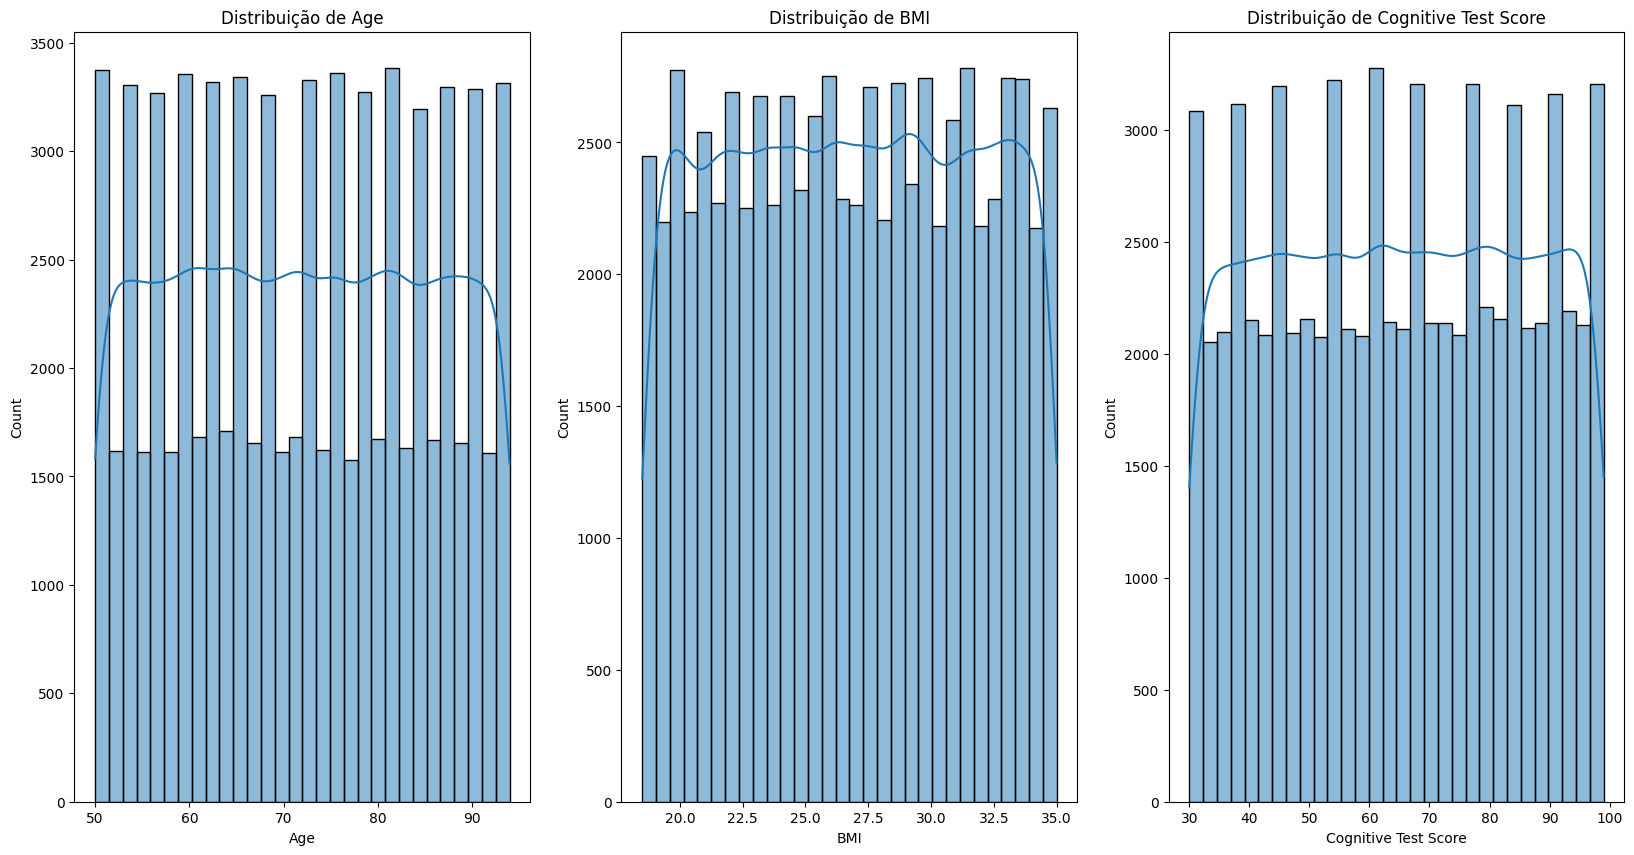

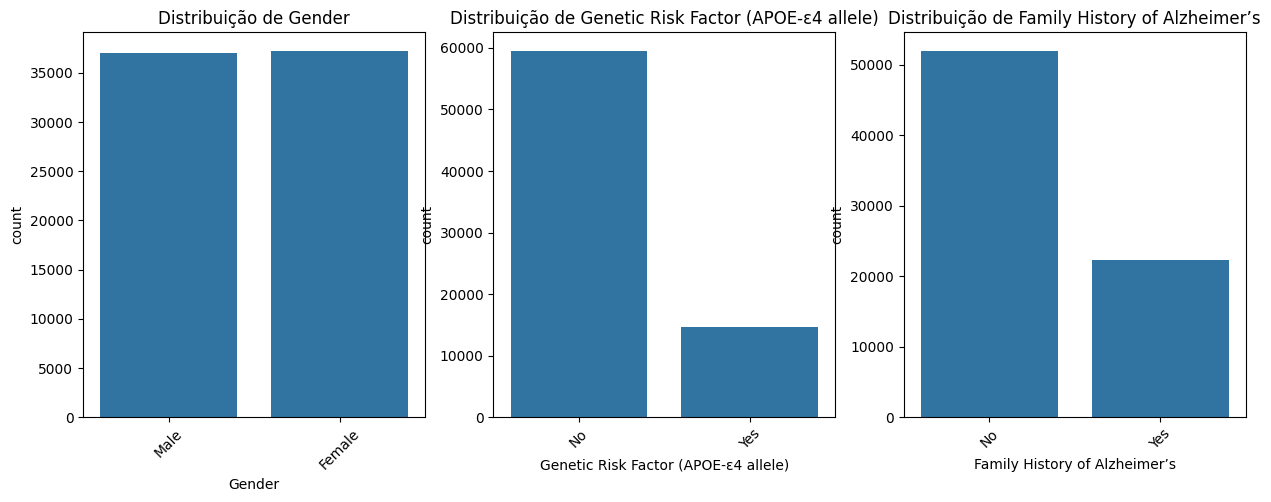

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#distribuição de variáveis numéricas
num_cols = ["Age", "BMI", "Cognitive Test Score"]

plt.figure(figsize=(20,10))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
plt.show()

#distribuição de categorias

cat_cols = ["Gender", "Genetic Risk Factor (APOE-ε4 allele)", "Family History of Alzheimer’s"]

plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f'Distribuição de {col}')
plt.show()